In [28]:
from gaussian_process import RBFKernel, GaussianProcessRegressor
import numpy as np
import matplotlib.pyplot as plt

## GaussianProcess for regression

In [29]:
def get_y(x, alpha):
    return np.cos(x)*0.3 + np.random.normal(0, alpha, size=x.shape)

In [30]:
observation_size = 6
gpr = GaussianProcessRegressor(RBFKernel, sigma_overall=0.04, l_scale=0.5, alpha=1e-4)
sample_size = 3

### Prior distribution

In [31]:
test_x = np.linspace(0, 10, 100)
prior_mean, prior_cov = gpr.predict(test_x, return_cov=True)
sample_ys = gpr.sample_func(test_x, n_samples=sample_size)
uncertainty = 1.96 * np.sqrt(np.diag(prior_cov))

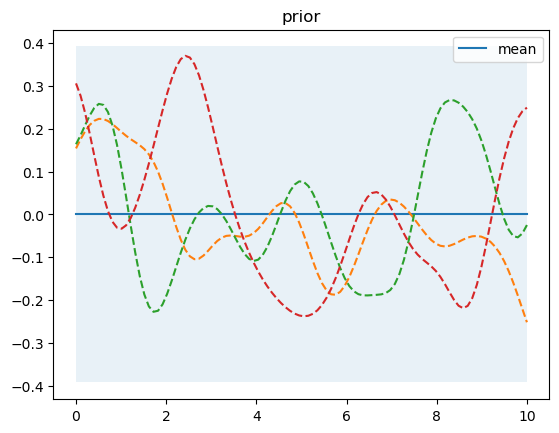

In [32]:
plt.plot(test_x, prior_mean, label='mean')
plt.fill_between(test_x, prior_mean-uncertainty, prior_mean+uncertainty, alpha=0.1)
for i in range(sample_size):
    plt.plot(test_x, sample_ys[i], linestyle='--')
plt.legend()
plt.title('prior')
plt.show()

### Posterior distribution

In [33]:
train_x = np.array([3, 1, 4, 5, 7, 9])
train_y = get_y(train_x, alpha=1e-4)

In [34]:
gpr.fit(train_x, train_y)
y_mean, y_cov = gpr.predict(test_x, return_cov=True)
sample_ys = gpr.sample_func(test_x, n_samples=sample_size)
uncertainty = 1.96 * np.sqrt(np.diag(y_cov))

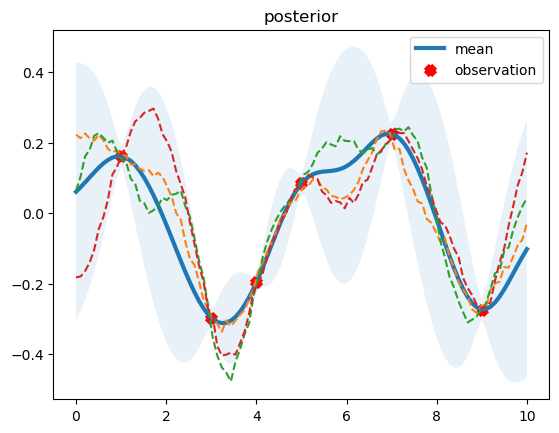

In [45]:
plt.plot(test_x, y_mean, label='mean', linewidth=3)
plt.fill_between(test_x, y_mean-uncertainty, y_mean+uncertainty, alpha=0.1)
for i in range(sample_size):
    plt.plot(test_x, sample_ys[i], linestyle='--')
plt.scatter(train_x, train_y, c='red', marker='x', label='observation', linewidths=5)
plt.legend()
plt.title('posterior')
plt.show()